In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [2]:
df = pd.read_csv(r"C:\Users\HW\Downloads\Titanic-Dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.drop('Cabin',axis = 1 , inplace = True)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [14]:
df['Age'].fillna(value =df['Age'].mean(),inplace = True )

In [15]:
df.drop('Embarked',axis = 1 , inplace = True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [20]:
data_corr = df.drop(['PassengerId','Name','Sex','Ticket','Fare'],axis = 1).corr()

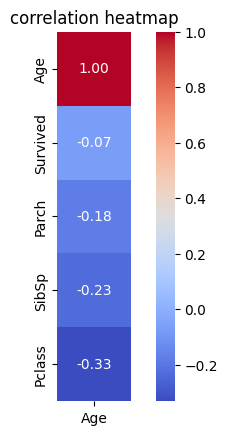

In [66]:
corr = data_corr.loc['Age']
sns.heatmap(pd.DataFrame(corr.sort_values(ascending = False)),cmap = 'coolwarm',cbar =True ,annot =True ,square = True , fmt = '.2f')
plt.title('correlation heatmap')
plt.show()


In [46]:
Male = df['Sex'] == "male"
Female = df["Sex"] == "female"

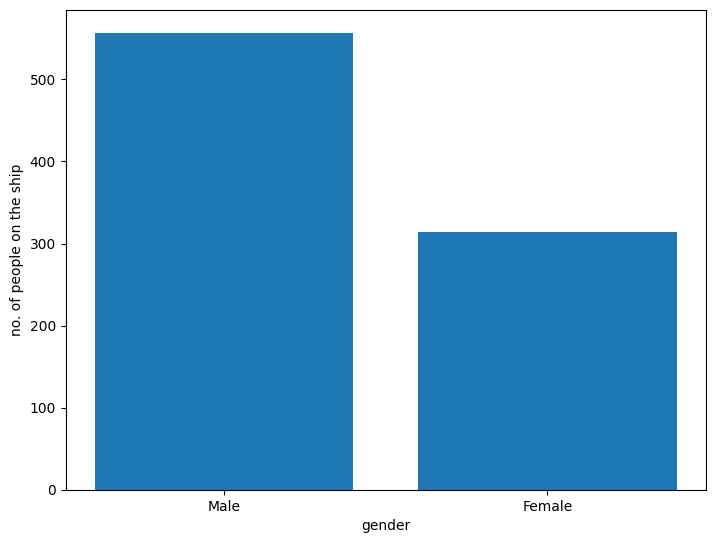

In [61]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [557,314]
ax.bar(gender,index)
plt.xlabel('gender')
plt.ylabel('no. of people on the ship')
plt.show()

In [64]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [71]:
alive = len(df[df['Survived'] == 1])
dead = len(df[df['Survived'] == 0])

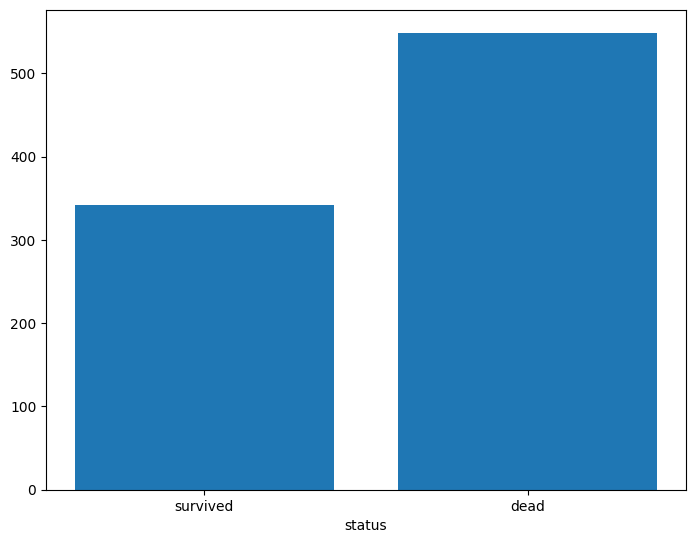

In [73]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['survived','dead']
plt.bar(status,[alive,dead])
plt.xlabel('status')
plt.show()

In [4]:
plt.figure(1)
age = df.loc[df.Survived == 1,'Age']
plt.title('histogram of the age of the people that had suvived')
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

plt.figure(2)
age = df.loc[df.Survived == 0,'Age']
plt.title('histogram of the age of the people that couldn\'t suvived')
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

NameError: name 'plt' is not defined

In [2]:
df[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

NameError: name 'df' is not defined

In [82]:
df[['Age','Survived']].groupby(['Age'],as_index = False).mean().sort_values(by = 'Age',ascending = True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
84,70.00,0.0
85,70.50,0.0
86,71.00,0.0
87,74.00,0.0
